<a href="https://colab.research.google.com/github/ReidelVichot/PUS2022_Heat-TreesPHL/blob/main/HeatMapVisualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Importing the dataframes from the PUS2022 google drive folder
heat_shape = gpd.GeoDataFrame.from_file("/content/drive/Shareddrives/PUS2022/Heat_Trees_project/heat.shp")




[]

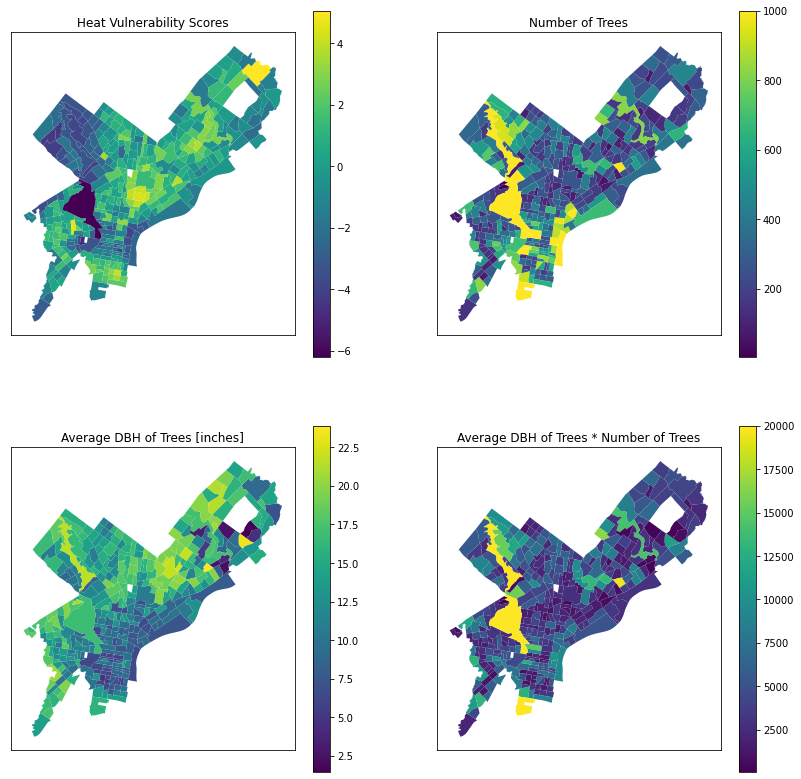

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(14, 14))
heat_shape.plot('HVI_SCORE', ax=ax[0,0], legend=True)
ax[0,0].set_title("Heat Vulnerability Scores")
heat_shape.plot('num_trees', ax=ax[0,1], legend=True, vmax=1000)
ax[0,1].set_title("Number of Trees")
heat_shape.plot('ave_dbh', ax=ax[1,0], legend=True)
ax[1,0].set_title("Average DBH of Trees [inches]")
heat_shape.plot('dbh_trees', ax=ax[1,1], legend=True, vmax=20000)
ax[1,1].set_title("Average DBH of Trees * Number of Trees")

ax[0,0].set_yticks([])
ax[0,1].set_yticks([])
ax[1,0].set_yticks([])
ax[1,1].set_yticks([])
ax[0,0].set_xticks([])
ax[0,1].set_xticks([])
ax[1,0].set_xticks([])
ax[1,1].set_xticks([])